In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
dir_path = '/content/drive/MyDrive/TaxiFare/'
df = pd.read_csv(dir_path + 'train.csv', nrows=5500)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [21]:
df = df.loc[:, 'fare_amount': 'pickup_datetime']
df.head()

,fare_amount,pickup_datetime
0,4.5,2009-06-15 17:26:21
1,16.9,2010-01-05 16:52:16
2,5.7,2011-08-18 00:35:00
3,7.7,2012-04-21 04:30:42
4,5.3,2010-03-09 07:51:00


In [22]:
df['pickup_datetime'].isnull().sum()

0

In [23]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
df['pickup_datetime'].head()

0   2009-06-15 17:26:21
1   2010-01-05 16:52:16
2   2011-08-18 00:35:00
3   2012-04-21 04:30:42
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]

In [24]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010


In [25]:
df[df['year'] == 2012]

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
6,7.5,2012-11-20 20:35:00,20,20,11,1,2012
7,16.5,2012-01-04 17:22:00,17,4,1,2,2012
8,9.0,2012-12-03 13:10:00,13,3,12,0,2012
10,5.3,2012-04-08 07:30:50,7,8,4,6,2012
...,...,...,...,...,...,...,...
5453,13.0,2012-11-26 11:06:11,11,26,11,0,2012
5464,12.5,2012-08-19 02:46:00,2,19,8,6,2012
5481,6.9,2012-01-26 13:12:00,13,26,1,3,2012
5482,7.5,2012-09-04 22:15:00,22,4,9,1,2012


Text(0, 0.5, 'Fare Amount')

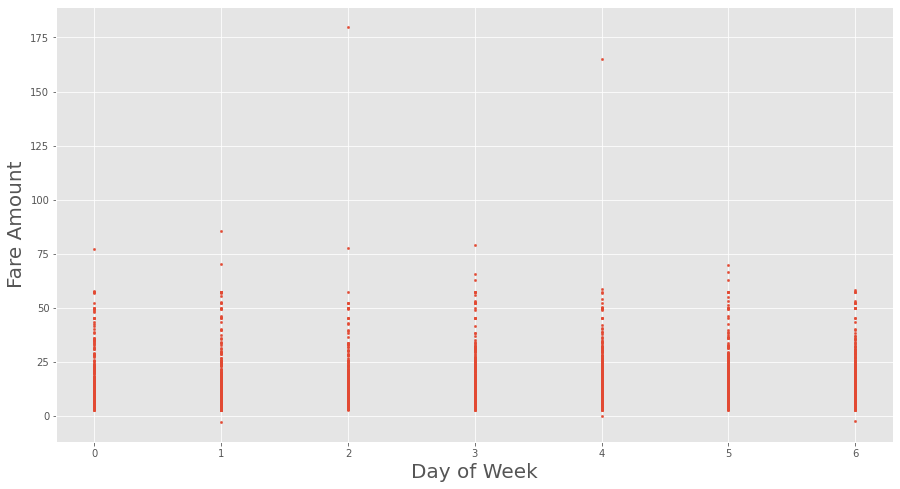

In [26]:
#曜日ごとにデータの分布を確認
plt.figure(figsize=(15,8))
plt.scatter(df['dayofweek'], df['fare_amount'], s=5)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Fare Amount', fontsize=20)

Text(0, 0.5, 'Frequency')

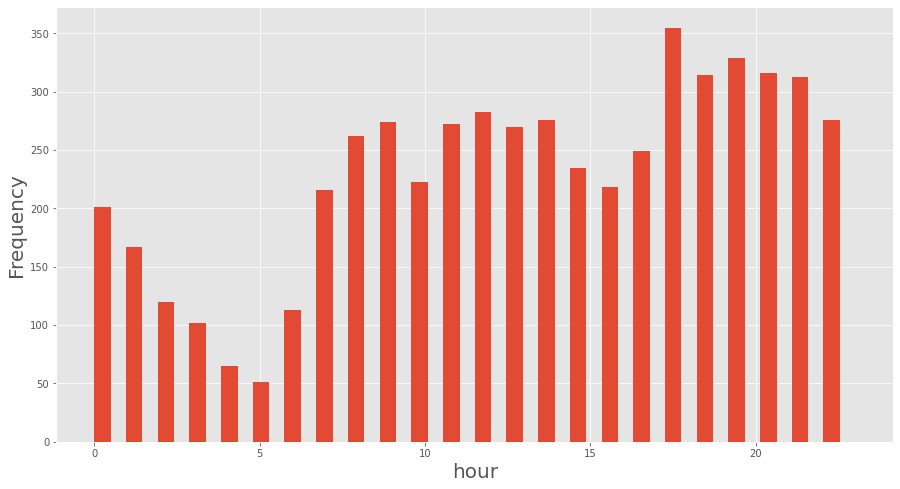

In [27]:
#時間ごとのデータ数を確認
plt.figure(figsize=(15,8))
plt.hist(df['hour'], bins=len(df['hour'].value_counts()), width=0.5)
plt.xlabel('hour', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

In [28]:
import datetime as dt
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
df['drop_offdatetime'] = df['pickup_datetime'] + dt.timedelta(minutes=30)
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,drop_offdatetime
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00


In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
df['drop_offdatetime'] = pd.to_datetime(df['drop_offdatetime'], format="%Y-%m-%d %H:%M:%S UTC")

df['ride_time_m'] = (df['drop_offdatetime'] - df['pickup_datetime']).astype('timedelta64[m]')

df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,drop_offdatetime,ride_time_m
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0


In [32]:
#休日の判定
def judge_holiday(dayofweek):
  return np.where((dayofweek == 5) | (dayofweek == 6), 1, 0)

In [33]:
df['holiday'] = judge_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,drop_offdatetime,ride_time_m,holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0


In [34]:
#次の日が休日かどうか判定
def judge_next_day_is_holiday(dayofweek):
  return np.where((dayofweek == 4) | (dayofweek == 5), 1, 0)
  

In [35]:
df['next_day_is_holiday'] = judge_next_day_is_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,drop_offdatetime,ride_time_m,holiday,next_day_is_holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0


In [41]:
#季節の判定
def judge_season(month):
  if 3 <= month <= 5:
    season = 0
  elif 6 <= month <= 8:
    season = 1
  elif 9 <= month <= 11:
    season = 2
  else:
    season = 3
    
  return season

In [43]:
df['season'] = df['month'].apply(judge_season)
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,drop_offdatetime,ride_time_m,holiday,next_day_is_holiday,season
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0,1
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0,3
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0,1
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1,0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0,0
